In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

ROOT_PATH = os.path.abspath("../../../../")
INPUT_FILE = os.path.join(ROOT_PATH, "data/preparation/prepped_files/08_converted.pkl")

In [2]:
data = pd.read_pickle(INPUT_FILE)
data.copy()

,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,...,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DELAY_MINS
5626534,-11.0,-8.0,-2,223,2558.85060,4,-0.781831,0.62349,0.986286,-0.165048,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-7
5627321,-8.0,-8.0,-4,88,650.17336,5,-0.781831,0.62349,0.982450,-0.186524,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-11
5622325,-8.0,-7.0,302,57,170.59004,7,-0.781831,0.62349,0.979925,-0.199368,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,333
5626430,-11.0,-9.0,-2,98,719.37498,6,-0.781831,0.62349,0.956305,-0.292372,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,11
5625623,-11.0,-9.0,-4,76,363.71084,7,-0.781831,0.62349,0.945519,-0.325568,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291377,-11.0,-9.0,-11,220,2811.51698,2,0.000000,1.00000,0.985556,-0.169350,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-20
11292052,-11.0,-6.0,-2,264,3366.73928,2,0.000000,1.00000,0.977231,-0.212178,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-26
11290999,-11.0,-5.0,-1,246,3133.38498,3,0.000000,1.00000,0.960050,-0.279829,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
11290527,-11.0,-11.0,-4,276,3442.37826,4,0.000000,1.00000,0.958820,-0.284015,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-33


In [3]:
delays = data.ARR_DELAY_MINS.to_numpy()
# Formulating limits and labels of binning
bins = [delays.min()-1,-15,15,delays.max()+1]
labels=["Early", "On Time", "Late"]

# Creating dict for transition from cat to numerical
trans_dict = {}
for count, label in enumerate(labels):
    trans_dict.update({
        label : count
    })

# Do the binning
binned = pd.cut(data.ARR_DELAY_MINS, bins, labels=labels, include_lowest=True)
# Insert correct categorical number
data["ARR_DELAY_CATS"] = binned.apply(lambda x: trans_dict.get(x))
data = data.drop(["ARR_DELAY_MINS"], axis="columns")
data.copy()

,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,...,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DELAY_CATS
5626534,-11.0,-8.0,-2,223,2558.85060,4,-0.781831,0.62349,0.986286,-0.165048,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
5627321,-8.0,-8.0,-4,88,650.17336,5,-0.781831,0.62349,0.982450,-0.186524,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
5622325,-8.0,-7.0,302,57,170.59004,7,-0.781831,0.62349,0.979925,-0.199368,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,2
5626430,-11.0,-9.0,-2,98,719.37498,6,-0.781831,0.62349,0.956305,-0.292372,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
5625623,-11.0,-9.0,-4,76,363.71084,7,-0.781831,0.62349,0.945519,-0.325568,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291377,-11.0,-9.0,-11,220,2811.51698,2,0.000000,1.00000,0.985556,-0.169350,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
11292052,-11.0,-6.0,-2,264,3366.73928,2,0.000000,1.00000,0.977231,-0.212178,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
11290999,-11.0,-5.0,-1,246,3133.38498,3,0.000000,1.00000,0.960050,-0.279829,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1
11290527,-11.0,-11.0,-4,276,3442.37826,4,0.000000,1.00000,0.958820,-0.284015,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from main.utils.data_manage_utils import print_time

# Split test and train data
X = data[data.columns[:-1]]
y = data[data.columns[-1:]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Converting DataFrames to numpy and flatten y-arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().flatten()
y_test = y_test.to_numpy().flatten()

# Initializing model
clf = RandomForestClassifier(random_state=42, class_weight="balanced")

# Initialize StratifiedKFold with 5 folds
k = 5
skf = StratifiedKFold(n_splits=k, random_state=42, shuffle=True)

# Perform stratified cross-validation with increasing max-depth
results_array = []
n_values = 10
start = 3
steps = 3
depth_range = [i for i in range(start,start*n_values+1,steps)]
for depth in depth_range:
    start, start_str = print_time()
    print(f"Starting depth {depth}/{max(depth_range)} at {start_str}...")
    clf.max_depth = depth
    val_scores = []
    train_scores = []
    count = 1
    for train_index, test_index in skf.split(X_train, y_train):
        print(f"Starting fold {count}/{5}...")
        X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    
        # Fit the classifier on the training data
        clf.fit(X_train_fold, y_train_fold)
    
        # Evaluate the classifier on the validation and training data
        v_s = clf.score(X_val_fold, y_val_fold)
        val_scores.append(v_s)
        t_s = clf.score(X_train_fold, y_train_fold)
        train_scores.append(t_s)
        
        # Document score for run
        print(f"\tValidation score: {v_s:.4f}")
        print(f"\tTraining score: {t_s:.4f}")
        count += 1
        
    # Calculate measures for documentation and plots
    end,end_str = print_time()
    duration = end-start
    mean_val_score = sum(val_scores) / len(val_scores)
    mean_train_score = sum(train_scores) / len(train_scores)
    std_val_score = np.std(val_scores)
    std_train_score = np.std(train_scores)
    
    # Print the cross-validation scores
    print("\n=========================")
    print(f"Results for depth {depth}:")
    print("Cross-validation train scores:", train_scores)
    print("Cross-validation validation scores:", val_scores)
    
    # Print the mean and standard deviation of the cross-validation scores
    print("Validation:")
    print("\tMean accuracy:", mean_val_score)
    print("\tStandard deviation of accuracy:", std_val_score)
    print("Training:")
    print("\tMean accuracy:", mean_train_score)
    print("\tStandard deviation of accuracy:", std_train_score)
    print("Time: ", duration)
    print("=========================\n")
    
    # Add results from run into array
    results_array.append((depth,duration,(mean_val_score, std_val_score), (mean_train_score,std_train_score)))


Starting depth 3/30 at 2024_03_20 18:46...
Starting fold 1/5...
	Validation score: 0.5840
	Training score: 0.5866
Starting fold 2/5...
	Validation score: 0.5850
	Training score: 0.5840
Starting fold 3/5...
	Validation score: 0.5813
	Training score: 0.5817
Starting fold 4/5...
	Validation score: 0.5885
	Training score: 0.5852
Starting fold 5/5...
	Validation score: 0.5835
	Training score: 0.5862

Results for depth 3:
Cross-validation train scores: [0.5865786391034473, 0.5840338585963762, 0.5817018984785243, 0.5852430321798842, 0.586248373053274]
Cross-validation validation scores: [0.5839721379458916, 0.5849774697951636, 0.5812897202972963, 0.5885246490251697, 0.5834619941833328]
Validation:
	Mean accuracy: 0.5844451942493708
	Standard deviation of accuracy: 0.002369504126300534
Training:
	Mean accuracy: 0.5847611602823012
	Standard deviation of accuracy: 0.0017683485031824106
Time:  0:01:17.111843

Starting depth 6/30 at 2024_03_20 18:47...
Starting fold 1/5...
	Validation score: 0.616

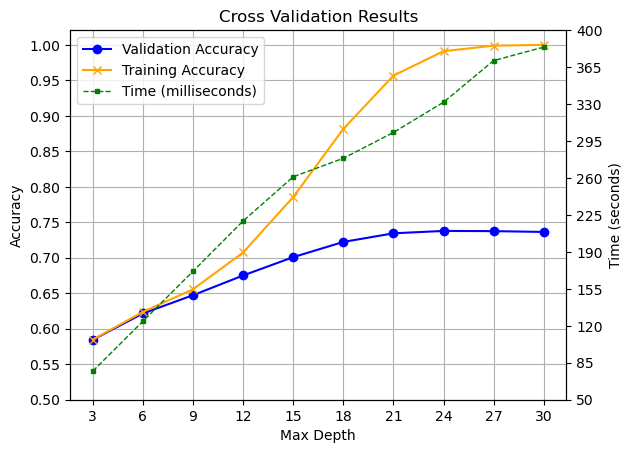

In [109]:
# Create data
depth = []
time = []
val_acc = []
train_acc = []
for tuple in results_array:
    depth.append(tuple[0])
    time.append(tuple[1].seconds + (tuple[1].microseconds / 10**6))
    val_acc.append(tuple[2][0])
    train_acc.append(tuple[3][0])

# Start with plot
fig, ax1 = plt.subplots()


# Add grid lines
ax1.grid(True)

# Create twin axes for seconds data
ax2 = ax1.twinx()

# Accuracy plots
val_line = ax1.plot(depth, val_acc, label='Validation Accuracy', marker='o', color='blue')
train_line = ax1.plot(depth, train_acc, label='Training Accuracy', marker='x', color='orange')

# Milliseconds plot
time_line = ax2.plot(depth, time, label='Time (milliseconds)', marker='s', color='green', linestyle="dashed", linewidth=1, markersize = 3)

# Set labels and title
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Accuracy')
ax1.set_title('Cross Validation Results')
ax2.set_ylabel('Time (seconds)')
# Combine legend for both axes
lines = val_line + train_line + time_line
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels)

ax1.set_xticks(np.arange(start=min(depth), stop=max(depth)+3, step=3))
y_range = np.arange(start=0.5, stop=1.0 + 0.05, step=0.05)
ax1.set_yticks(y_range)

# Calculate second y-axis scale
min_secs = 50
max_secs = 400
spacing = (max_secs-min_secs) / (len(y_range)-1)
ax2.set_yticks(np.arange(start = min_secs, stop = max_secs +spacing, step = spacing))
plt.show()